# Searching & downloading *Kepler*, *K2*, and *TESS* data

## Learning Goals

By the end of this tutorial, you will:

* Understand the data products available to query and download.
* Be able to use [Lightkurve](https://docs.lightkurve.org) to search for *Kepler*/*K2* and *TESS* data products.
* Know how to download *TESS* Full Frame Image cutouts.
* Be able to perform a cone search.

## Introduction

The [Lightkurve](https://docs.lightkurve.org) Python package has functions to search for and download observations from *Kepler*/*K2* and *TESS*. These tools are built to make accessing space telescope data clear and straightforward, with intuitive method and keyword names.

This tutorial outlines what data products are available to query with Lightkurve, and gives examples of how to use the functions to search for and download space telescope observations.

## Imports

This tutorial requires the [**Lightkurve**](http://docs.lightkurve.org/) package, which uses [**Matplotlib**](https://matplotlib.org/) for plotting.

In [3]:
import lightkurve as lk
import matplotlib.pyplot as plt
%matplotlib inline

---

## 1. What Data Products are Available?

*Kepler*/*K2* and *TESS* data products are stored on the Mikulski Archive for Space Telescopes (MAST) in two main forms:

* **Light curve products**: tables containing the measured flux at each observation time.
* **Target pixel file products**: stacks of images with the pixel-level observation at each observation time.

There are also the following additional products available to query and download using [Lightkurve](http://docs.lightkurve.org/):

* **High Level Science Products (HLSPs)**: a specific version of a data product produced by an analysis or photometry pipeline. Lightkurve has access to HLSP light curves produced by the photometry pipelines [EVEREST](https://archive.stsci.edu/hlsp/everest), [K2SFF](https://archive.stsci.edu/hlsp/k2sff), and [K2SC](https://arxiv.org/abs/1603.09167). For more information about HLSPs, please see [this article](https://archive.stsci.edu/hlsp/) on the Space Telescope Science Institute's archive.
* **Full Frame Images (FFIs)**: a download of all active detector pixels at once. *TESS* FFIs are captured with 30-minute cadence, and custom cutouts of *TESS* FFIs can be queried and downloaded using [Lightkurve](http://docs.lightkurve.org/).

Lightkurve allows you to query and download each of these data products. The following sections contain examples of how to use the search functions in Lightkurve.

## 2. Searching for Light Curves

Lightkurve uses [Astroquery](https://astroquery.readthedocs.io/en/latest/) to search for data products. Astroquery allows searches based on a target's coordinates, catalog ID number, or name.

This is passed into the search function using the `target` keyword, and all valid inputs for identifying a target include:
    
  * The name of the object as a string, for example, "Kepler-10."
  * The KIC or EPIC identifier as an integer, for example, "11904151."
  * A coordinate string in decimal format, for example, "285.67942179 +50.24130576."
  * A coordinate string in sexagesimal format, for example, "19:02:43.1 +50:14:28.7."
  * An `astropy.coordinates.SkyCoord` object.

You can also specify which mission you would like to retrieve data from using the `mission` keyword, which takes "Kepler," "K2," or "TESS." By default, all available missions will be returned.

We will start with the case of searching for a *Kepler* target using its Kepler Input Catalog (KIC) ID number. Below, we search for [KIC 3733346](https://arxiv.org/pdf/1001.0417.pdf), an [RR Lyrae star](https://en.wikipedia.org/wiki/RR_Lyrae_variable), using the [search_lightcurve](https://docs.lightkurve.org/reference/api/lightkurve.search_lightcurve.html?highlight=search_lightcurve) function.

In [13]:
search_result = lk.search_lightcurve('NGC 821')
search_result

SearchResult containing 4 data products.

 #     mission     year author exptime target_name distance
                                  s                 arcsec 
--- -------------- ---- ------ ------- ----------- --------
  0 TESS Sector 42 2021    QLP     600   337010656      0.0
  1 TESS Sector 42 2021    QLP     600 10002248572      0.0
  2 TESS Sector 43 2021    QLP     600   337010656      0.0
  3 TESS Sector 43 2021    QLP     600 10002248572      0.0

`search_lightcurve` returns a `SearchResult` table, which contains information about the data products available to download. This search result tells us that KIC 3733346 was observed in *Kepler* Quarters 1–16. 

You can select an individual entry in this search result by indexing the search result.

In [3]:
search_result[0]

SearchResult containing 1 data products.

 #     mission     year author exptime target_name distance
                                  s                 arcsec 
--- -------------- ---- ------ ------- ----------- --------
  0 TESS Sector 42 2021    QLP     600   337010656      0.0

For more information about the available data products, the `SearchResult` has a full table accessible by calling [.table](https://docs.lightkurve.org/reference/api/lightkurve.SearchResult.table.html?highlight=table). This full table contains the columns listed below. Definitions of each of these terms can be found [here](https://mast.stsci.edu/api/v0/_c_a_o_mfields.html).

In [4]:
for column in search_result.table.columns:
  print(column)

intentType
obs_collection
provenance_name
instrument_name
project
filters
wavelength_region
target_name
target_classification
obs_id
s_ra
s_dec
dataproduct_type
proposal_pi
calib_level
t_min
t_max
t_exptime
em_min
em_max
obs_title
t_obs_release
proposal_id
proposal_type
sequence_number
s_region
jpegURL
dataURL
dataRights
mtFlag
srcDen
obsid
objID
objID1
distance
exptime
obsID
obs_collection_products
dataproduct_type_products
description
type
dataURI
productType
productGroupDescription
productSubGroupDescription
productDocumentationURL
project_products
prvversion
proposal_id_products
productFilename
size
parent_obsid
dataRights_products
calib_level_products
author
mission
#
year
sort_order


These column names can also be used to search for specific entries in the table.

In [ ]:
# import numpy, which we will use to find the desired index in the table
import numpy as np
quarter2_index = np.where(search_result.table['mission'] == 'Kepler Quarter 02')[0]
search_result[quarter2_index]

You can also narrow down the list of observations when you make the search using the following mission-specific keywords: 
* *Kepler*: `quarter` 
* *K2*: `campaign`
* *TESS*: `sector`

Let's perform the search for KIC 3733346 again, this time specifying that we only want data from *Kepler* Quarter 2.

In [ ]:
search_result_q2 = lk.search_lightcurve('KIC 3733346', author='Kepler', quarter=2)
search_result_q2

### 2.1 Downloading a single light curve

A light curve can be downloaded by calling [.download()](https://docs.lightkurve.org/reference/api/lightkurve.SearchResult.download.html?highlight=download#lightkurve.SearchResult.download). 

In [15]:
lc = search_result.download()
lc
#TIC 337010656 = NGC 821 (why galaxy in TIC?)
#but MAST radius = 0.00033° => star

<TessLightCurve length=3446 LABEL="TIC 337010656" SECTOR=42 AUTHOR=QLP FLUX_ORIGIN=sap_flux>
       time               flux        ... kspsap_flux_sml kspsap_flux_lag
                                      ...                                
       Time             float32       ...     float32         float32    
------------------ ------------------ ... --------------- ---------------
2447.6934810867565 0.9601667523384094 ...      0.98697567       1.0219467
2447.7004261895904 0.9688646793365479 ...       0.9878175       1.0327042
2447.7073712924257 0.9720925688743591 ...       0.9923239       1.0367347
2447.7143163945784   0.96820068359375 ...        1.005002      0.97487295
2447.7212614960945 0.9942976236343384 ...       1.0093734       1.0301875
  2447.72820659761 0.9585387110710144 ...       0.9873677       1.0030123
2447.7351516991266 0.9707633852958679 ...       1.0168706      0.96871763
 2447.742096800643 0.9658156037330627 ...       0.9960782       0.9973348
2447.7490419021597 0.9839930534362793 ...       1.0165191        0.997621
               ...                ... ...             ...             ...
2473.0912631965684  1.284214735031128 ...       1.0249336       1.0336579
2473.0982080861427 1.4213314056396484 ...       1.0543437       1.1956033
2473.1051529757146 1.2302242517471313 ...       0.9650812       0.9758783
 2473.112097865289 1.2783278226852417 ...      0.98997897       1.0019342
2473.1190427548627  1.137731909751892 ...      0.92944413        0.870471
 2473.125987644434 1.3416424989700317 ...       1.0038568       1.0583793
 2473.139877425562 1.4238332509994507 ...       1.0236863        1.128965
2473.1468223164443 1.2844301462173462 ...      0.96871907       0.9693735
 2473.153767207323  1.424710988998413 ...       1.0083019       1.1152534
 2473.160712098205 1.1945931911468506 ...       0.9115717      0.87359625

In [19]:
# Assuming you've already obtained your light curve and stored it in 'lc'
fits_file_path = 'NGC821_lightkurve.fits'

# Convert the time and flux arrays to float data type
time = lc.time.value  # Get the numerical values
flux = lc.flux  # No need to convert, as it's already a numeric array

# Create a FITS header with some relevant metadata
fits_header = fits.Header()
fits_header['OBJECT'] = 'NGC 821'  # Replace with the actual object name
fits_header['MISSION'] = 'TESS'  # Replace with the mission name if not TESS
# Add more metadata as needed

# Create a FITS HDU from the light curve data and header
fits_hdu = fits.BinTableHDU.from_columns([fits.Column(name='TIME', format='D', array=time),
                                          fits.Column(name='FLUX', format='E', array=flux)], header=fits_header)

# Save the FITS file
fits_hdu.writeto(fits_file_path, overwrite=True)

This returns a single `KeplerLightCurve` object, which is shown above in the form of an `astropy` table. We can examine the light curve using the `plot` method.

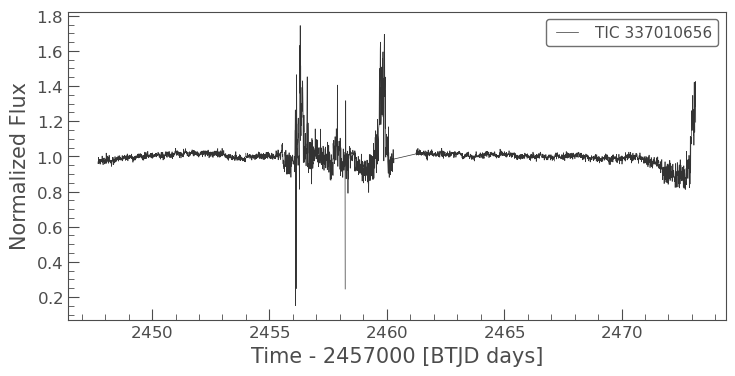

In [6]:
lc.plot();

### 2.2 Downloading a collection of light curves

The `SearchResult` object also has a [download_all](https://docs.lightkurve.org/reference/api/lightkurve.SearchResult.download_all.html?highlight=download_all) method, allowing you to download multiple light curves. This returns a `LightCurveCollection`, a convenient container for `LightCurve` objects.

In [4]:
lc_collection = search_result.download_all()
lc_collection

LightCurveCollection of 4 objects:
    0: <TessLightCurve LABEL="TIC 337010656" SECTOR=42 AUTHOR=QLP FLUX_ORIGIN=sap_flux>
    1: <TessLightCurve LABEL="TIC 10002248572" SECTOR=42 AUTHOR=QLP FLUX_ORIGIN=sap_flux>
    2: <TessLightCurve LABEL="TIC 337010656" SECTOR=43 AUTHOR=QLP FLUX_ORIGIN=sap_flux>
    3: <TessLightCurve LABEL="TIC 10002248572" SECTOR=43 AUTHOR=QLP FLUX_ORIGIN=sap_flux>

The `LightCurveCollection` has a number of useful functions for plotting and manipulating the light curves. For more information about how to combine multiple light curves, please see the tutorial on combining multiple quarters of *Kepler* observations.

One of the methods the collection enables you to use is `plot`, making it possible to quickly visualize all observations in your collection.

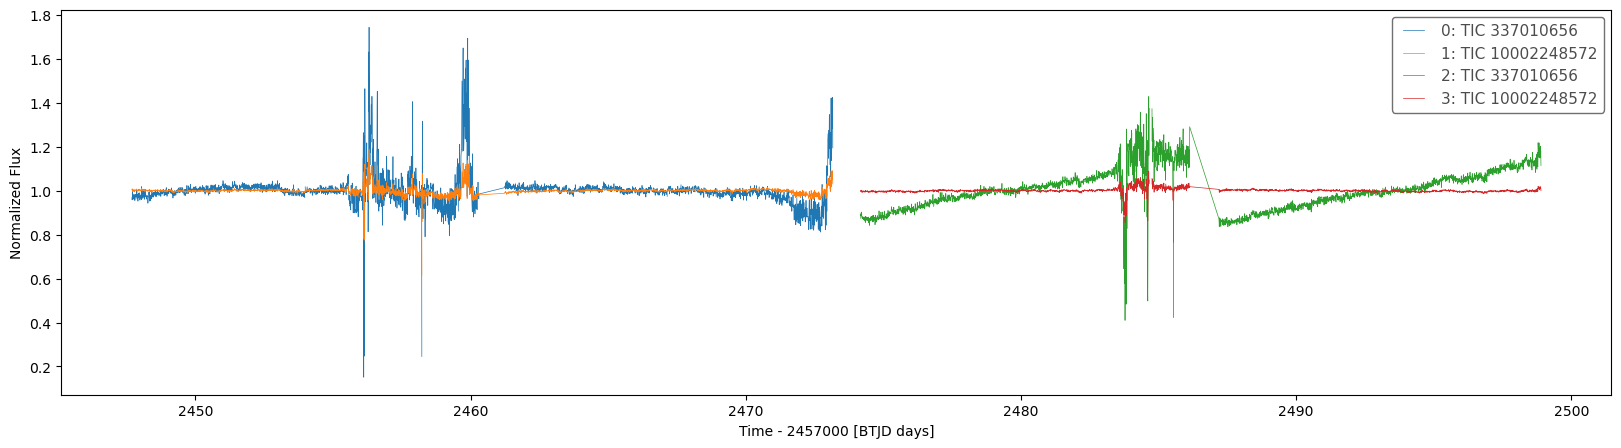

In [7]:
# Create a larger figure for clarity
fig, ax = plt.subplots(figsize=(20,5))
# Plot the light curve collection
plt.savefig('NGC821 lightkurve')
lc_collection.plot(ax=ax);

You can also iterate through a collection to label them more clearly and to perform additional actions like normalization.

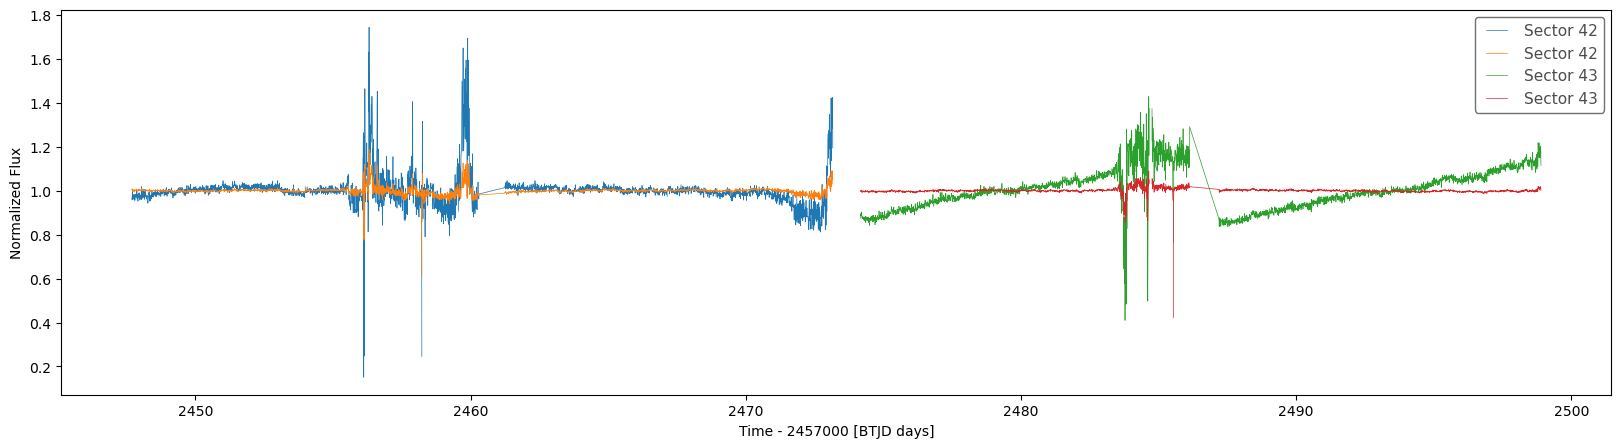

In [6]:
fig, ax = plt.subplots(figsize=(20,5))
for lc in lc_collection:
  lc.normalize().plot(ax=ax, label=f'Sector {lc.sector}');

## 3. Searching for Target Pixel Files

The other primary data product used by Lightkurve is the [TargetPixelFile](https://heasarc.gsfc.nasa.gov/docs/tess/data-products.html#target-pixel-files-tpfs), or TPF. A TPF is a stack of images containing the flux in each pixel at each cadence.

Similar to the approach above, we can use the [search_targetpixelfile](https://docs.lightkurve.org/reference/api/lightkurve.search_targetpixelfile.html?highlight=search_targetpixelfile) method to identify available observations.

In [3]:
searchresult = lk.search_targetpixelfile('32.08807 +10.99495', radius=500)
searchresult
#TIC 337010656 not available

SearchResult containing 9 data products.

 #     mission     year   author  exptime target_name distance
                                     s                 arcsec 
--- -------------- ---- --------- ------- ----------- --------
  0 TESS Sector 42 2021 TESS-SPOC     600   337010638    326.2
  1 TESS Sector 43 2021 TESS-SPOC     600   337010638    326.2
  2 TESS Sector 42 2021 TESS-SPOC     600   337010640    336.3
  3 TESS Sector 43 2021 TESS-SPOC     600   337010640    336.3
  4 TESS Sector 43 2021 TESS-SPOC     600   337026285    391.1
  5 TESS Sector 42 2021 TESS-SPOC     600   337010632    432.8
  6 TESS Sector 43 2021 TESS-SPOC     600   337010632    432.8
  7 TESS Sector 42 2021 TESS-SPOC     600   337026326    444.8
  8 TESS Sector 43 2021 TESS-SPOC     600   337026326    444.8

This returns a table which contains the same information as a light curve search result.

### 3.1 Downloading a single target pixel file

When you call `download` on a search result containing more than one entry, it will download only the first entry in the search result. Lightkurve will raise a friendly warning to let you know when this occurs.

In [4]:
tpf = searchresult.download()

C:\Users\Gumbledalf\Miniconda3\Lib\site-packages\lightkurve\search.py:414: LightkurveWarning: Warning: 9 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


We can view a single cadence of the TPF using the `plot` method.

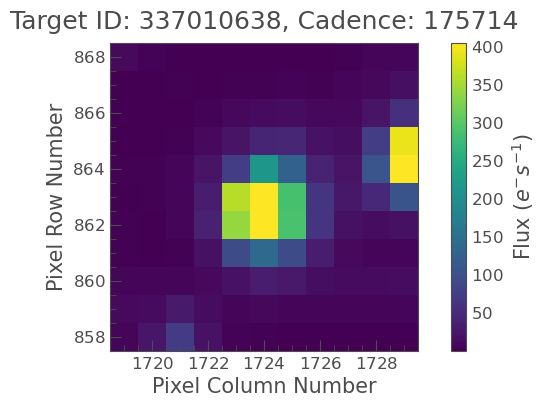

In [5]:
tpf.plot();
#random star

If we want to turn the TPF into a light curve, there is a [to_lightcurve](https://docs.lightkurve.org/reference/api/lightkurve.KeplerTargetPixelFile.to_lightcurve.html?highlight=to_lightcurve) method. 

In [ ]:
lc = tpf.to_lightcurve()
lc.plot();

For more information about using and plotting TPFs, please see the tutorials on using *Kepler* target pixel file products with Lightkurve and plotting *Kepler* target pixel file products with Lightkurve.

### 3.2 Downloading a collection of target pixel files

You can also download multiple TPFs at a time using the `download_all` method, which returns a `TargetPixelFileCollection`.

In [ ]:
tpf_collection = searchresult.download_all()
tpf_collection

A single cadence of each of these TPFs can be inspected with the `plot` method.

In [ ]:
tpf_collection.plot();

## 4. Searching for *TESS* Full Frame Image (FFI) Cutouts

It is also possible to download targets observed in the *TESS* Full Frame Images (FFIs) using Lightkurve. This is done using [search_tesscut](https://docs.lightkurve.org/reference/api/lightkurve.search_tesscut.html?highlight=search_tesscut), which utilizes the [TESSCut](https://mast.stsci.edu/tesscut/) tool ([Brasseur et. al 2019](https://ui.adsabs.harvard.edu/abs/2019ascl.soft05007B/abstract)).

In [4]:
search_result = lk.search_tesscut('NGC 821')
search_result

SearchResult containing 2 data products.

 #     mission     year  author exptime target_name distance
                                   s                 arcsec 
--- -------------- ---- ------- ------- ----------- --------
  0 TESS Sector 42 2021 TESScut     475     NGC 821      0.0
  1 TESS Sector 43 2021 TESScut     475     NGC 821      0.0

*TESS* FFI cutouts are downloaded as `TargetPixelFile` objects. This is done using the same download function as above, but it now takes an additional argument `cutout_size`, which describes the number of pixels along the side of the cutout, and can be an `int` or a `tuple`.

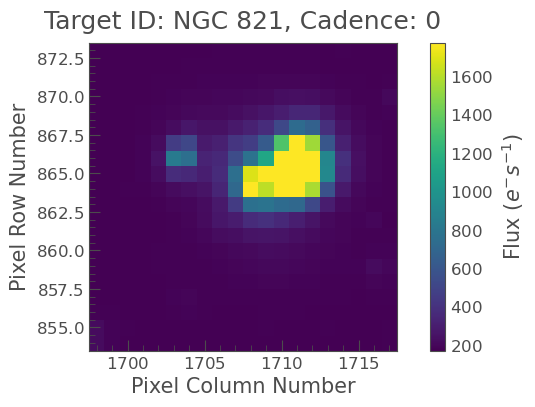

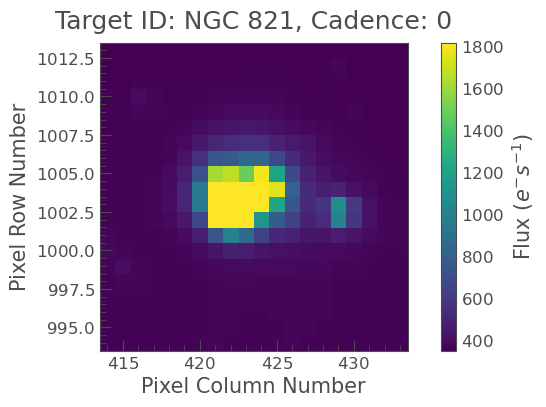

In [8]:
tpf_cutout = search_result[0].download(cutout_size=20)
tpf_cutout.plot()
plt.savefig('NGC 821 lightkurve Sec42')
tpf_cutout2 = search_result[1].download(cutout_size=20)
tpf_cutout2.plot()
plt.savefig('NGC 821 lightkurve Sec43')

In [ ]:
#my own (from tesscut notebook)
with fits.open('32.087042, 10.994953/NGC 821 TGLC 40pxlc/hlsp_tglc_tess_ffi_gaiaid-2571199008022444416-s0042-cam3-ccd3_tess_v1_llc.fits') as hdul:
    print(hdul[1].columns.names)

In [9]:
import astroquery
astroquery.__citation__

'@ARTICLE{2019AJ....157...98G,\n   author = {{Ginsburg}, A. and {Sip{\\H o}cz}, B.~M. and {Brasseur}, C.~E. and\n\t{Cowperthwaite}, P.~S. and {Craig}, M.~W. and {Deil}, C. and\n\t{Guillochon}, J. and {Guzman}, G. and {Liedtke}, S. and {Lian Lim}, P. and\n\t{Lockhart}, K.~E. and {Mommert}, M. and {Morris}, B.~M. and\n\t{Norman}, H. and {Parikh}, M. and {Persson}, M.~V. and {Robitaille}, T.~P. and\n\t{Segovia}, J.-C. and {Singer}, L.~P. and {Tollerud}, E.~J. and\n\t{de Val-Borro}, M. and {Valtchanov}, I. and {Woillez}, J. and\n\t{The Astroquery collaboration} and {a subset of the astropy collaboration}\n\t},\n    title = "{astroquery: An Astronomical Web-querying Package in Python}",\n  journal = {\\aj},\narchivePrefix = "arXiv",\n   eprint = {1901.04520},\n primaryClass = "astro-ph.IM",\n keywords = {astronomical databases: miscellaneous, virtual observatory tools},\n     year = 2019,\n    month = mar,\n   volume = 157,\n      eid = {98},\n    pages = {98},\n      doi = {10.3847/1538-38

## 5. Performing a Cone Search

If you are interested in identifying a number of nearby targets, you can perform a cone search, which will return all available targets within a cone of a specfied radius on the sky. The radius can be either a `float` or an [astropy.units.Quantity](https://docs.astropy.org/en/stable/units/) object. If a float is given, it will be assumed to be in units of arcseconds.  If `None` then we default to 0.0001 arcsec.

In [ ]:
search_result = lk.search_targetpixelfile('Trappist-1', radius=180., campaign=12, exptime=1800)
print(search_result)

The `distance` column describes the distance on the sky in arcseconds from the target or coordinates passed into the search.

## About this Notebook

**Authors**: Nicholas Saunders (nksaun@hawaii.edu)

**Updated**: September 28, 2020

## Citing Lightkurve and Astropy

If you use `lightkurve` or its dependencies in your published research, please cite the authors. Click the buttons below to copy BibTeX entries to your clipboard.

In [7]:
lk.show_citation_instructions()

In [9]:
search_result = lk.search_lightcurve('ESO 114-14')
search_result

SearchResult containing 6 data products.

 #     mission     year       author      exptime target_name distance
                                             s                 arcsec 
--- -------------- ---- ----------------- ------- ----------- --------
  0 TESS Sector 02 2018               QLP    1800 10001422290      0.0
  1 TESS Sector 02 2018 GSFC-ELEANOR-LITE    1800 10001422290      0.0
  2 TESS Sector 02 2018             TASOC    1800 10001422290      0.0
  3 TESS Sector 02 2018             TASOC    1800 10001422290      0.0
  4 TESS Sector 28 2020               QLP     600 10001422290      0.0
  5 TESS Sector 29 2020               QLP     600 10001422290      0.0

In [4]:
lk.search_lightcurve('3C 273')

SearchResult containing 10 data products.

 #      mission     year   author  exptime  target_name  distance
                                      s                   arcsec 
--- --------------- ---- --------- ------- ------------- --------
  0 K2 Campaign 10b 2016        K2      60 ktwo229151988      0.0
  1 K2 Campaign 10b 2016        K2    1800 ktwo229151988      0.0
  2 K2 Campaign 102 2016   EVEREST    1800 ktwo229151988      0.0
  3 K2 Campaign 102 2016      K2SC    1800 ktwo229151988      0.0
  4 K2 Campaign 102 2016     K2SFF    1800 ktwo229151988      0.0
  5  TESS Sector 46 2021      SPOC      20     377297839      0.0
  6  TESS Sector 46 2021      SPOC     120     377297839      0.0
  7  TESS Sector 46 2021 TESS-SPOC     600     377297839      0.0
  8  TESS Sector 46 2021       QLP     600     377297839      0.0
  9  TESS Sector 46 2021       QLP     600   10005000530      0.0

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

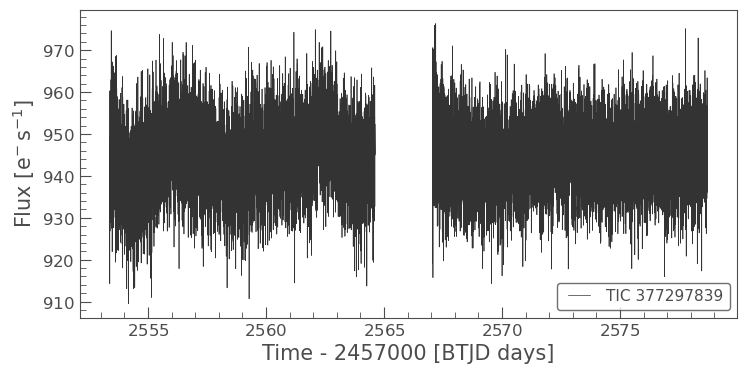

In [6]:
lc = lk.search_lightcurve('3C 273')[6].download()
lc.plot()

<img style="float: right;" src="https://raw.githubusercontent.com/spacetelescope/notebooks/master/assets/stsci_pri_combo_mark_horizonal_white_bkgd.png" alt="Space Telescope Logo" width="200px"/>
